<a href="https://colab.research.google.com/github/amulyabodempudi/amulya_INFO5731_Fall2023/blob/main/Amulya_Bodempudi_INFO5731_Assignment_Three_fall2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).


In [ ]:
import nltk
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter
import pandas as pd

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def get_ngrams(tokens, n):
    return list(ngrams(tokens, n))

def count_ngrams(tokens, n):
    n_grams = get_ngrams(tokens, n)
    return Counter(n_grams)

def calculate_bigram_probabilities(tokens):
    bigrams = get_ngrams(tokens, 2)
    unigrams = tokens
    bigram_counts = Counter(bigrams)
    unigram_counts = Counter(unigrams)

    probabilities = {}

    for bigram in bigram_counts:
        w1, w2 = bigram
        probability = bigram_counts[bigram] / unigram_counts[w1]
        probabilities[bigram] = probability

    return probabilities

def extract_noun_phrases(text):
    # You can use a more sophisticated approach for noun phrase extraction
    # For simplicity, we'll use a basic method here.
    tokens = word_tokenize(text)
    tagged_tokens = nltk.pos_tag(tokens)

    # Extracting noun phrases using a simple rule
    grammar = "NP: {<DT>?<JJ>*<NN>}"
    cp = nltk.RegexpParser(grammar)
    tree = cp.parse(tagged_tokens)

    noun_phrases = []
    for subtree in tree.subtrees():
        if subtree.label() == 'NP':
            noun_phrases.append(' '.join(word for word, tag in subtree.leaves()))

    return noun_phrases

def calculate_relative_probabilities(dataset):
    all_noun_phrases = []
    review_noun_phrases = []

    for review in dataset:
        noun_phrases = extract_noun_phrases(review)
        review_noun_phrases.append(Counter(noun_phrases))
        all_noun_phrases.extend(noun_phrases)

    max_freq = Counter(all_noun_phrases)

    relative_probabilities = []
    for review_noun_phrase_count in review_noun_phrases:
        relative_probabilities.append({
            np: review_noun_phrase_count[np] / max_freq[np] if max_freq[np] != 0 else 0
            for np in review_noun_phrase_count
        })

    return relative_probabilities

# Upload the dataset.txt file to your Colab environment

# Read the dataset from a file
with open('/imdb_reviews_cleaned.csv', 'r', encoding='utf-8') as file:
    dataset = file.readlines()

# Tokenize the dataset
tokenized_dataset = [word_tokenize(review) for review in dataset]

# Count the frequency of all the N-grams (N=3)
trigram_counts = count_ngrams([tuple(review) for review in tokenized_dataset], 3)
print("Trigram Frequencies:")
print(trigram_counts)

# Calculate the probabilities for all the bigrams
bigram_probabilities = calculate_bigram_probabilities([word for review in tokenized_dataset for word in review])
print("\nBigram Probabilities:")
print(bigram_probabilities)

# Extract all the noun phrases and calculate relative probabilities
relative_probabilities = calculate_relative_probabilities(dataset)
df = pd.DataFrame(relative_probabilities)
df = df.fillna(0)  # Fill NaN values with 0 for better presentation
print("\nRelative Probabilities of Noun Phrases:")
print(df)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Trigram Frequencies:
Counter({(('imagin', 'video', 'game', 'shoot', 'bad', 'guy', 'hardwar', 'old', 'everyth', 'kind', 'slow', 'focu', 'oppon', 'set', 'easi', 'instal', 'hack', 'give', 'invinc', 'autoaim', 'come', 'slowli', 'shout', 'open', 'weapon', 'fire', 'three', 'four', 'bullet', 'run', 'shoot', 'anyth', 'anyway', 'use', 'sniper', 'explos', 'trap', 'kind', 'cant', 'even', 'hit', 'theyr', 'next', 'wield', 'knife', 'tri', 'fight', 'decent', 'manner', 'yet', 'avatar', 'move', 'like', 'year', 'old', 'man', 'even', 'autoaim', 'still', 'suck', 'somehow', 'get', 'mani', 'separ', 'level', 'noth', 'make', 'sen', 'get', 'big', 'cinemat', 'take', 'cinemat', 'k', 'whatev', 'feel', 'like', 'slow', 'motionthat', 'friend', 'experi', 'watch', 'jw', 'style', 'peopl', 'applaud', 'first', 'movi', 'turn', 'dement', 'caricatur', 'fight', 'scene', 'ridicul', 'bad', 'action', 'charact', 'make', 'sen', 'world', 'describ', 'make', 'sen', 'even', 'tongueincheek', 'refer', 'matrix', 'dont', 'hit', 'know', '

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

documents = [
   "John Wick 4 takes the absurdity of its predecessor to new heights, with an even more ridiculous body count and poorly thought-out adversaries.",
    "Unbelievable events and lack of believability make it hard to invest in the idea that John Wick is truly dead at the end.",
    "The film's genuine and thrilling fights make it a superior choice over alternatives, showcasing the franchise's commitment to excellence.",
    "The film's attempt at humor and action falls flat, leaving viewers longing for the more grounded and engaging narrative of the earlier movies in the series.",
    "The end credits scene further diminishes any remaining joy, leaving the audience with a sense of sadness."
]

# Sample query
query = "John Wick 4 takes the absurdity of its predecessor to new heights, with an even more ridiculous body count and poorly thought-out adversaries.."

# Combine documents and query for TF-IDF matrix calculation
all_texts = documents + [query]

#Build TF-IDF matrix
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_texts)

#Calculate cosine similarity
cosine_similarities = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1])

#Rank documents based on cosine similarity
document_scores = list(enumerate(cosine_similarities[0]))
sorted_documents = sorted(document_scores, key=lambda x: x[1], reverse=True)

#Print the TF-IDF matrix
print("Terms\t", "\t".join(["Document " + str(i + 1) for i in range(len(documents))] + ["Query"]))
terms = vectorizer.get_feature_names_out()
for i in range(len(terms)):
    print(terms[i], end="\t")
    for j in range(len(all_texts)):
        print(f"{tfidf_matrix[j, i]:.4f}", end="\t")
    print()

#Print the ranked documents
print("\nQuery:", query)
print("\nRanked Documents:")
for index, score in sorted_documents:
    print(f"Document {index + 1}: Similarity Score = {score:.4f}")
    print(f"   {documents[index]}")
    print()

Terms	 Document 1	Document 2	Document 3	Document 4	Document 5	Query
absurdity	0.2268	0.0000	0.0000	0.0000	0.0000	0.2268	
action	0.0000	0.0000	0.0000	0.2150	0.0000	0.0000	
adversaries	0.2268	0.0000	0.0000	0.0000	0.0000	0.2268	
alternatives	0.0000	0.0000	0.2633	0.0000	0.0000	0.0000	
an	0.2268	0.0000	0.0000	0.0000	0.0000	0.2268	
and	0.1417	0.1243	0.1349	0.2203	0.0000	0.1417	
any	0.0000	0.0000	0.0000	0.0000	0.2787	0.0000	
at	0.0000	0.1990	0.0000	0.1763	0.0000	0.0000	
attempt	0.0000	0.0000	0.0000	0.2150	0.0000	0.0000	
audience	0.0000	0.0000	0.0000	0.0000	0.2787	0.0000	
believability	0.0000	0.2426	0.0000	0.0000	0.0000	0.0000	
body	0.2268	0.0000	0.0000	0.0000	0.0000	0.2268	
choice	0.0000	0.0000	0.2633	0.0000	0.0000	0.0000	
commitment	0.0000	0.0000	0.2633	0.0000	0.0000	0.0000	
count	0.2268	0.0000	0.0000	0.0000	0.0000	0.2268	
credits	0.0000	0.0000	0.0000	0.0000	0.2787	0.0000	
dead	0.0000	0.2426	0.0000	0.0000	0.0000	0.0000	
diminishes	0.0000	0.0000	0.0000	0.0000	0.2787	0.0000	
earlier	0.0000	0.0

# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

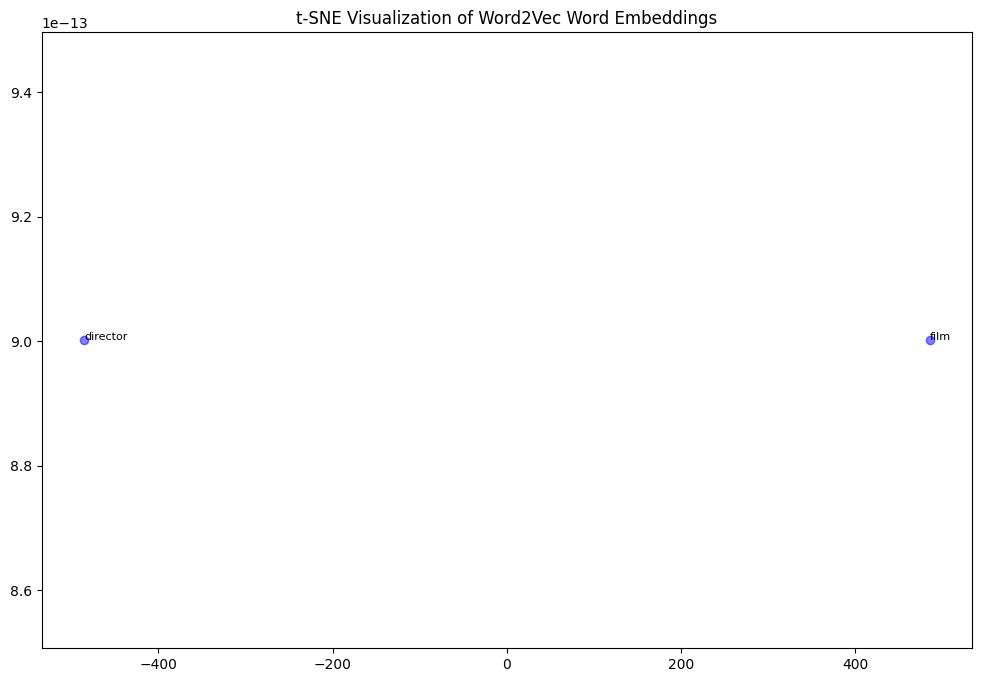

In [ ]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Load your IMDb reviews dataset
csv_path = "/imdb_reviews_cleaned.csv"
df = pd.read_csv(csv_path)

# Assuming the column name is 'Cleaned Review' (replace with the actual column name)
corpus = [str(review).split() for review in df['Cleaned Review']]

# Train Word2Vec model
model = Word2Vec(sentences=corpus, vector_size=300, window=5, min_count=1, workers=4)
model.save("word2vec_model.bin")

# Visualize word embeddings using t-SNE with a safe perplexity value
def visualize_embeddings(model, words):
    vectors = np.array([model.wv[word] for word in words if word in model.wv])

    # Ensure perplexity is less than the number of samples
    perplexity = min(5, len(vectors)-1)

    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    vectors_tsne = tsne.fit_transform(vectors)

    plt.figure(figsize=(12, 8))
    plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1], marker='o', color='b', alpha=0.5)

    for i, word in enumerate(words):
        if i < len(vectors_tsne):  # Ensure we don't go out of bounds
            plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]), fontsize=8)

    plt.title("t-SNE Visualization of Word2Vec Word Embeddings")
    plt.show()

# Choose words to visualize
words_to_visualize = ["film", "director", "cinematography", "performance", "exciting", "predictable"]

# Visualize embeddings
visualize_embeddings(model, words_to_visualize)


# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file



# Link:

https://github.com/amulyabodempudi/amulya_INFO5731_Fall2023/blob/main/annotated_reviews.csv

